# Classic Models V01.2 <a id='home'></a>

Modelos de dados de loja de venda de modelos de veículos (carros antigos, trens, etc) em escala

## Sumário

1. [Introdução](#introdução)
   1. [Modelos de dados](#modelo-de-dados)
2. [Importação de bibliotecas](#import-de-bibliotecas)
3. [Configurações](#configurações)
4. [Detalhamento das tabelas](#detalhamento-das-tabelas)
5. [Carga de dados da base](#)
6. [Listagem de tabelas na base](#obter-tabelas)
1. [Vendas por clientes](#vendas-por-clientes)
   1. [Clientes com maior volume de vendas](#clientes-com-maior-volume-de-vendas)
   2. [Clientes com menor volume de vendas](#clientes-com-menor-volume-de-vendas)
2. [Vendas por categorias](#vendas-por-categorias)
   1. [Categorias melhor vendidas](#categorias-melhor-vendidas)
   2.  [Categorias menos vendidas](#categorias-menos-vendidas)
3.  [Vendas por produtos](#vendas-por-produtos)
    1.  [Produtos mais vendidos](#produtos-mais-vendidos)
    2.  [Produtos menos Vendas por períodos](#produtos-menos-vendas-por-períodos)
4.  [Vendas por períodos](#)
    1.  [Períodos de maior venda](#períodos-de-maior-venda)
    2.  [Periodos de menor venda](#periodos-de-menor-venda)
5.  [Análise das vendas](#)
6.  [Differência ano a ano (por mês)](#differência-ano-a-ano-(por-mês))
7.  [Vendas por vendedores](#vendas-por-vendedores)
    1.  [Vendedores com melhor desempenho](#vendedores-com-melhor-desempenho)
    2.  [Vendedores com pior desempenho](#vendedores-com-pior-desempenho)
8.  [Vendas por filial](#)
    1.  [Lojas com maior volume de vendas](#lojas-com-maior-volume-de-vendas)
    2.  [Lojas com pior volume de vendas](#lojas-com-pior-volume-de-vendas)
9.  [Vendas por cidades](#)
    1.  [Cidades com maior volume de vendas](#cidades-com-maior-volume-de-vendas)
    2.  [Cidade com menores volume de vendas](#cidade-com-menores-volume-de-vendas)
10. [Vendas por gerente/coordenador](#vendas-por-gerente/coordenador)
    1.  [Gerentes/Coordenadores com melhor desempenho](#gerentes/coordenadores-com-melhor-desempenho)
    2.  [Gerentes/Coordenadores com pior desempenho](#gerentes/coordenadores-com-pior-desempenho)
11. [Pagamentos pendentes](#pagamentos-pendentes)


## Introdução

### Modelo de dados <a id='modelo-de-dados'></a>

<img src='./../../docs/imgs/classicmodels.png' alt="Modelo de dados" />


### Import de bibliotecas

In [9]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine,text
from sqlalchemy.engine.url import URL
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

### Configurações

In [10]:
# Seaborn style

DARKGRID = "darkgrid"
WHITEGRID = "whitegrid"

sns.set_style(DARKGRID)

# sns.set_theme(style="whitegrid")



# Databse
usuario = 'root'
senha = 'secret'

engine = create_engine(URL(
    drivername = 'mysql+pymysql',
    username = usuario,
    password = senha,
    
    host = 'localhost',
    query = {'charset': 'utf8'},
    port = 3306, 
    database='classicmodels'
))

conn = engine.connect()

# Função de consulta
def query(q_):
    try:
        result = pd.read_sql(text(q_), conn)
        display(result.shape, result.head()) 
        return result
    except:
        return None

### Detalhamento das tabelas

In [11]:
tables = query('show tables')

for table in tables.values:
    print(f'\nDetalhes da tabela: << {table[0].upper()} >>\n')
    query(f'show columns from {table[0]}')
    print('\n= = = = = = = = = = = = = = = = = = = = = = = = = = ')

(8, 1)

,Tables_in_classicmodels
0,customers
1,employees
2,offices
3,orderdetails
4,orders



Detalhes da tabela: << CUSTOMERS >>



(13, 6)

,Field,Type,Null,Key,Default,Extra
0,customerNumber,int,NO,PRI,None,
1,customerName,varchar(50),NO,,None,
2,contactLastName,varchar(50),NO,,None,
3,contactFirstName,varchar(50),NO,,None,
4,phone,varchar(50),NO,,None,



= = = = = = = = = = = = = = = = = = = = = = = = = = 

Detalhes da tabela: << EMPLOYEES >>



(8, 6)

,Field,Type,Null,Key,Default,Extra
0,employeeNumber,int,NO,PRI,None,
1,lastName,varchar(50),NO,,None,
2,firstName,varchar(50),NO,,None,
3,extension,varchar(10),NO,,None,
4,email,varchar(100),NO,,None,



= = = = = = = = = = = = = = = = = = = = = = = = = = 

Detalhes da tabela: << OFFICES >>



(9, 6)

,Field,Type,Null,Key,Default,Extra
0,officeCode,varchar(10),NO,PRI,None,
1,city,varchar(50),NO,,None,
2,phone,varchar(50),NO,,None,
3,addressLine1,varchar(50),NO,,None,
4,addressLine2,varchar(50),YES,,None,



= = = = = = = = = = = = = = = = = = = = = = = = = = 

Detalhes da tabela: << ORDERDETAILS >>



(5, 6)

,Field,Type,Null,Key,Default,Extra
0,orderNumber,int,NO,PRI,None,
1,productCode,varchar(15),NO,PRI,None,
2,quantityOrdered,int,NO,,None,
3,priceEach,"decimal(10,2)",NO,,None,
4,orderLineNumber,smallint,NO,,None,



= = = = = = = = = = = = = = = = = = = = = = = = = = 

Detalhes da tabela: << ORDERS >>



(7, 6)

,Field,Type,Null,Key,Default,Extra
0,orderNumber,int,NO,PRI,None,
1,orderDate,date,NO,,None,
2,requiredDate,date,NO,,None,
3,shippedDate,date,YES,,None,
4,status,varchar(15),NO,,None,



= = = = = = = = = = = = = = = = = = = = = = = = = = 

Detalhes da tabela: << PAYMENTS >>



(4, 6)

,Field,Type,Null,Key,Default,Extra
0,customerNumber,int,NO,PRI,None,
1,checkNumber,varchar(50),NO,PRI,None,
2,paymentDate,date,NO,,None,
3,amount,"decimal(10,2)",NO,,None,



= = = = = = = = = = = = = = = = = = = = = = = = = = 

Detalhes da tabela: << PRODUCTLINES >>



(4, 6)

,Field,Type,Null,Key,Default,Extra
0,productLine,varchar(50),NO,PRI,None,
1,textDescription,varchar(4000),YES,,None,
2,htmlDescription,mediumtext,YES,,None,
3,image,mediumblob,YES,,None,



= = = = = = = = = = = = = = = = = = = = = = = = = = 

Detalhes da tabela: << PRODUCTS >>



(9, 6)

,Field,Type,Null,Key,Default,Extra
0,productCode,varchar(15),NO,PRI,None,
1,productName,varchar(70),NO,,None,
2,productLine,varchar(50),NO,MUL,None,
3,productScale,varchar(10),NO,,None,
4,productVendor,varchar(50),NO,,None,



= = = = = = = = = = = = = = = = = = = = = = = = = = 


## Vendas por clientes

Critério de pagamentos realizados por períodos (e total) por cada cliente

In [12]:
q = '''
SELECT c.customerName,
	p.paymentDate, p.amount
	-- clientes
    from customers c
    -- pagamentos
	join payments p on p.customerNumber = c.customerNumber
	order by p.paymentDate ASC 
'''

vendas_clientes = query(q)

(273, 3)

,customerName,paymentDate,amount
0,Online Diecast Creations Co.,2003-01-16,10223.83
1,"Blauer See Auto, Co.",2003-01-28,10549.01
2,Vitachrome Inc.,2003-01-30,5494.78
3,Baane Mini Imports,2003-02-16,50218.95
4,Danish Wholesale Imports,2003-02-20,53959.21


### Clientes com maior volume de vendas

In [13]:
agg_vendas = vendas_clientes.groupby('customerName')['amount'].sum().sort_values(ascending=False).reset_index()
head10 = agg_vendas.head(10)
tail10 = agg_vendas.tail(10)

In [14]:
def build_barplot_chart(df_, title_):
    plt.figure(figsize=(10,6))
    sns.barplot(data=df_, y='customerName', x='amount', orient='h')
    plt.xlabel('Vendas (USD)')
    plt.ylabel('Clientes')
    plt.title(title_)
    xlabels = [(k/1000) for k in np.linspace(0, int(df_.max().values[1]), 5)]
    plt.xticks(rotation=45)
    plt.show()

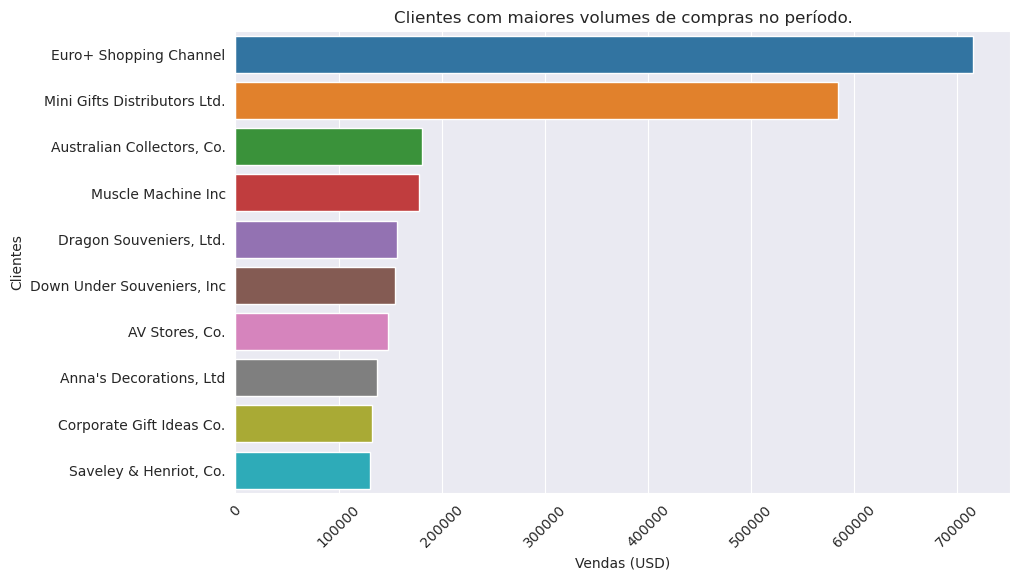

In [15]:
build_barplot_chart(head10, 'Clientes com maiores volumes de compras no período.')

### Clientes com menor volume de vendas

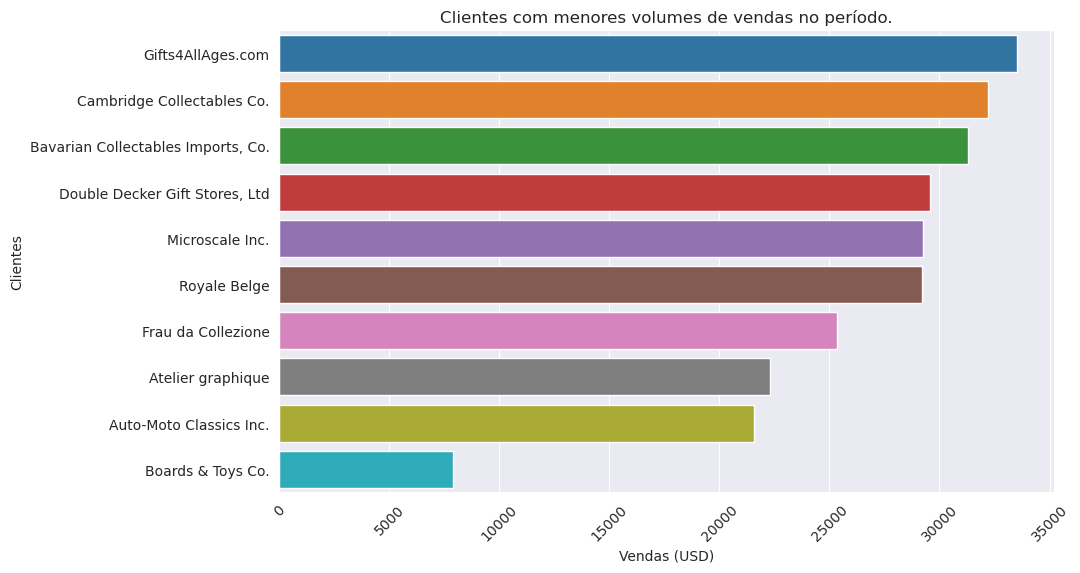

In [16]:
build_barplot_chart(tail10, 'Clientes com menores volumes de vendas no período.')

## Vendas por categorias (lineproducts)
	(*) Work in progress
### Categorias melhor vendidas
	(*) Work in progress
### Categorias menos vendidas
	(*) Work in progress
## Vendas por produtos
	(*) Work in progress
### Produtos mais vendidos
	(*) Work in progress
### Produtos menos 
	(*) Work in progress
## Vendas por períodos
	(*) Work in progress
### Períodos de maior venda
	(*) Work in progress
### Periodos de menor venda
	(*) Work in progress
## Análise das vendas 
	(*) Work in progress
### Differência ano a ano (por mês)
	(*) Work in progress
## Vendas por vendedores
	(*)  Levando em consideração o período de trabalho de cada um deles
	(*) Work in progress
### Vendedores com melhor desempenho
	(*) Work in progress
### Vendedores com pior desempenho
	(*) Work in progress
## Vendas por filial
	(*) Work in progress
### Lojas com maior volume de vendas
	(*) Work in progress
### Lojas com pior volume de vendas
	(*) Work in progress
## Vendas por cidades
	(*) Work in progress
### Cidades com maior volume de vendas
	(*) Work in progress
### Cidade com menores volume de vendas
	(*) Work in progress
## vendas por gerente/coordenador
	(*) Work in progress
### Gerentes/Coordenadores com melhor desempenho
	(*) Work in progress
### Gerentes/Coordenadores com pior desempenho
	(*) Work in progress
## Pagamentos pendentes 
	(*) Levando em consideração os pagamentos dos clientes (payments e seus pedidos e envios)
	(*) Work in progress


[inicio](#home)